### K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering

#### 라이브러리 로드 

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
def load_dataset():
    """
    붓꽃 데이터셋 리턴
    """
    iris = load_iris()
    cols = [feature.replace(' (cm)', '') for feature in iris.feature_names]
    irisDF = pd.DataFrame(data=iris.data, columns = cols)
    return irisDF, iris

irisDF, iris = load_dataset()

In [3]:
irisDF.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**KMeans 객체를 생성하고 군집화 수행**
* n_clusters - 군집화 갯수
* 초기화 
* 최대 반복 횟수 : 중심점을 구하기 위한 최대한의 반복수를 의미함

In [5]:
kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF) # 군집화 수행(비지도 학습임을 기억)

KMeans(n_clusters=3, random_state=0)

**label_속성을 통해 각 데이터 포인트 별로 할당된 군집 중심점(Centroid)확인하고 irisDF에 `cluster`컬럼으로 추가**

In [6]:
display(iris.target_names)
# 150개의 데이터 포인트에 맞춰서 Centrold값이 할당되었음을 알 수 있음
display(irisDF.shape, kmeans.labels_.shape)
display(f"중심점 : {kmeans.labels_}")  #
display(kmeans.predict(irisDF)) # 레이블 속성값 반환

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

(150, 4)

(150,)

'중심점 : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2\n 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2\n 2 0]'

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [7]:
irisDF["cluster"] = kmeans.labels_ # 레이블값을 cluster피처에 할당
irisDF["target"]  = iris.target

# 군집별로 붓꽃의 종류별 군집 정도 확인
# 틀러스터의 0,1,2는 임의의 군집 레이블임을 기억, 타겟값과는 다름
iris_result = irisDF.groupby(["target", "cluster"])["sepal length"].count()
display(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal length, dtype: int64

**2차원 평면에 데이터 포인트별로 군집화된 결과를 나타내기 위해 2차원 PCA값으로 각 데이터 차원축소**

,sepal length,sepal width,petal length,petal width,cluster,target,pca_X,pca_Y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949


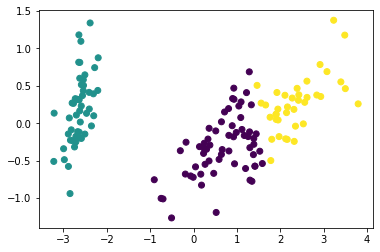

In [10]:
# 보통 군집화의 시각화를 위해서는 차원축소 후 시각화
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
#display(pca_transformed[0, :], pca_transformed)
display(irisDF.head(3))
irisDF["pca_X"] = pca_transformed[:, 0] # 첫번째 피처
irisDF["pca_Y"] = pca_transformed[:, 1] # 두번째 피처
# cluster별로 색깔 구분, c옵션은 색깔 옵션
plt.scatter(x=irisDF.loc[:, "pca_X"], y=irisDF.loc[:, "pca_Y"], c = irisDF["cluster"])
plt.show()

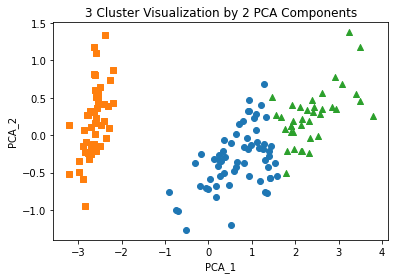

In [9]:
# 군집값이 0, 1, 2의 인덱스를 찾아서 해당 위치로 피처의 위치를 loc()로 찾음
marker0_idx = irisDF[irisDF["cluster"]==0].index
marker1_idx = irisDF[irisDF["cluster"]==1].index
marker2_idx = irisDF[irisDF["cluster"]==2].index

plt.scatter(x=irisDF.loc[marker0_idx, "pca_X"], y= irisDF.loc[marker0_idx, "pca_Y"], marker='o')
plt.scatter(x=irisDF.loc[marker1_idx, "pca_X"], y= irisDF.loc[marker1_idx, "pca_Y"], marker='s')
plt.scatter(x=irisDF.loc[marker2_idx, "pca_X"], y= irisDF.loc[marker2_idx, "pca_Y"], marker='^')

plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.title("3 Cluster Visualization by 2 PCA Components")
plt.show()               

### Clustering 알고리즘 테스트를 위한 데이터 생성 
* cluster_std값을 변경해보면서 비교

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [13]:
X, y = make_blobs(n_samples=200, n_features = 2, centers = 3, cluster_std=0.8, random_state=0)
display(X.shape, y.shape)

#타겟값의 분포도 확인
# return_count=True옵션은 unique, counts를 튜플로 리턴하도록 함
unique, counts = np.unique(y, return_counts=True)
display(f"Unique number: {unique},  Counts : {counts}")

(200, 2)

(200,)

'Unique number: [0 1 2],  Counts : [67 67 66]'

* n_samples: 생성할 총 데이터의 개수입니다. 디폴트는 100개입니다.  


* n_features: 데이터의 피처 개수입니다. 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처
는 y 좌표상에 표현합니다.  


* centers: int 값, 예를 들어 3으로 설정하면 군집의 개수를 나타냅니다. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군
집 중심점의 좌표를 의미합니다.  


* cluster_std: 생성될 군집 데이터의 표준 편차를 의미합니다. 만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이
터가 표준편차 0.8을 가진 값으로 만들어집니다.   
[0.8, 1.2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내 데이터의 표준편차는 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 만듭니다.군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용합니다 

In [14]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=["feature1", "feature2"])
clusterDF["target"] = y  # 할당된 Centroid(중심점)을 의미
clusterDF.head(3)

,feature1,feature2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


**make_blob()으로 만들어진 데이터 포인트들을 시각화**

array([0, 1, 2])

(3,)

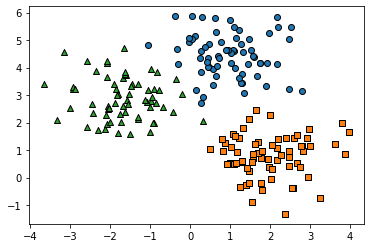

In [16]:
target_list = np.unique(y) # 0, 1, 2
display(target_list, target_list.shape)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 3개의 클러스터 영역으로 구분한 데이터셋을 생성했으므로 trarget)
# target==0, target==1, target==2로 scatter plot을 marker별로 생성
for target in target_list:
    target_cluster = clusterDF[clusterDF["target"]==target]
    plt.scatter(x=target_cluster["feature1"], y=target_cluster["feature2"], edgecolor='k', marker=markers[target])
plt.show()

array([0, 1, 2])

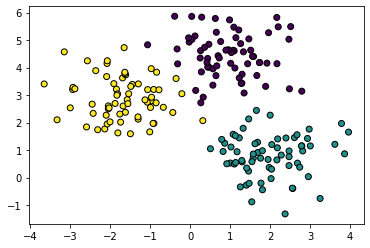

In [17]:
target_list = np.unique(y)
display(target_list)
plt.scatter(x=clusterDF["feature1"], y= clusterDF["feature2"], edgecolor="k", c=y)

**K-Means 클러스터링을 수행하고 개별 클러스터의 중심 위치를 시각화**

In [18]:
display(X[:10,:],X.shape)

array([[-1.69242695,  3.62202539],
       [ 0.69794036,  4.4288665 ],
       [ 1.10022802,  4.60631734],
       [-1.44872404,  3.38424521],
       [ 1.21486062,  5.36489604],
       [-0.90830163,  1.97077775],
       [ 2.47211942,  0.43703328],
       [ 1.65684156,  2.4412893 ],
       [ 1.07779975,  4.62537882],
       [-1.67942681,  2.60200265]])

(200, 2)

array([1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 2])

(200,)

'유니크한 클러스터 레이블 : [0 1 2]'

,feature1,feature2,target,cluster,kmeans_label
0,-1.692427,3.622025,2,1,1
1,0.697940,4.428867,0,0,0
2,1.100228,4.606317,0,0,0


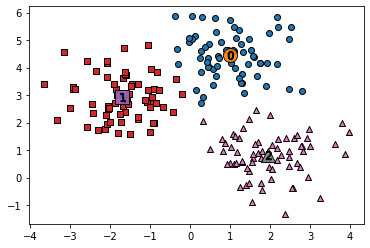

In [22]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=200, random_state=0)
cluster_label = kmeans.fit_predict(X)  #클러스터링 수행, fit()과 동일함
display(cluster_label, cluster_label.shape)

clusterDF['kmeans_label'] = cluster_label # 군집 레이블

centroid = kmeans.cluster_centers_ #중심위치 
unique_labels = np.unique(cluster_label)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

display(f"유니크한 클러스터 레이블 : {unique_labels}")
display(clusterDF.head(3))
for label in unique_labels:
    label_cluster = clusterDF[clusterDF["cluster"]==label]
    center_X_Y = centroid[label]  # 중심점 무리에서 해당 레이블에 해당하는 중심점 찾기
    plt.scatter(x=label_cluster["feature1"], y=label_cluster["feature2"], edgecolor="k", marker=markers[label])
    
    plt.scatter(x = center_X_Y[0], y= center_X_Y[1], edgecolor='k', s=200, alpha=0.9, marker=markers[label])
    plt.scatter(x = center_X_Y[0], y= center_X_Y[1], s=70, edgecolor='k', marker='$%d$' % label) # 레이블을 숫자로 표기
plt.show()

In [23]:
display(f"중심점의 좌표 : {kmeans.cluster_centers_}")  # 위의 중심점의 위치를 표시한 것.
display(f"군집 레이블 0 좌표: {kmeans.cluster_centers_[0]}")
display(f"군집 레이블 1 좌표: {kmeans.cluster_centers_[1]}")
display(f"군집 레이블 2 좌표: {kmeans.cluster_centers_[2]}")

'중심점의 좌표 : [[ 0.990103    4.44666506]\n [-1.70636483  2.92759224]\n [ 1.95763312  0.81041752]]'

'군집 레이블 0 좌표: [0.990103   4.44666506]'

'군집 레이블 1 좌표: [-1.70636483  2.92759224]'

'군집 레이블 2 좌표: [1.95763312 0.81041752]'

In [24]:
display(pd.DataFrame(clusterDF.groupby('target')['cluster'].value_counts()))

cluster
target cluster         
0      0             66
       1              1
1      2             67
2      1             65
       2              1

**정리**

`make_blobs()`은 `cluster_std`파라미터로 데이터의 분포도를 조정가능합니다. `cluster_std값`이 작을 수록 군집 중심에 데이터가 모여 있으며, 클수록 데이터가 퍼져있음을 알 수 있다.